In [1]:
import modin.pandas as pd     
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from imblearn.over_sampling import SMOTE

from pycaret.classification import *

In [2]:
data = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
X = data.drop('y', axis=1)
y = data['y']

In [5]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [6]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [7]:
setup = setup(data=data_resampled, target='y', train_size=0.7, 
            verbose=False, remove_outliers=True, 
            session_id=42, outliers_threshold=0.15,)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
id,Numeric
var1,Numeric
var2,Numeric
var3,Numeric
var4,Numeric
...,...
var65,Numeric
var66,Numeric
var67,Numeric
var68,Numeric


In [7]:
best_model = compare_models(fold=5, exclude=['xgboost'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8736,0.8850,0.5765,0.7391,0.6474,0.5719,0.5786,1.3400
lightgbm,Light Gradient Boosting Machine,0.8739,0.8847,0.5611,0.7506,0.6418,0.5672,0.5763,0.5640
catboost,CatBoost Classifier,0.8730,0.8876,0.5446,0.7576,0.6331,0.5589,0.5703,9.8680
ada,Ada Boost Classifier,0.8711,0.8774,0.5422,0.7488,0.6286,0.5531,0.5639,0.3040
rf,Random Forest Classifier,0.8592,0.8637,0.4034,0.7991,0.5358,0.4632,0.5011,0.4600
dt,Decision Tree Classifier,0.8053,0.7059,0.5393,0.5163,0.5273,0.4048,0.4051,0.1140
lda,Linear Discriminant Analysis,0.8411,0.8284,0.4141,0.6720,0.5123,0.4237,0.4415,0.2860
ridge,Ridge Classifier,0.8407,0.0000,0.3644,0.7010,0.4795,0.3963,0.4260,0.0220
lr,Logistic Regression,0.8395,0.7976,0.3644,0.6929,0.4775,0.3934,0.4218,2.3160
et,Extra Trees Classifier,0.8465,0.8369,0.3444,0.7643,0.4747,0.3996,0.4433,0.5140


In [11]:
model = create_model('lightgbm', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9082,0.9650,0.8971,0.9300,0.9132,0.8157,0.8163
1,0.9135,0.9680,0.9012,0.9359,0.9183,0.8265,0.8272
Mean,0.9108,0.9665,0.8992,0.9330,0.9158,0.8211,0.8218
SD,0.0027,0.0015,0.0021,0.0030,0.0025,0.0054,0.0054


In [12]:
tuned_model = tune_model(model, n_iter=10, search_library='scikit-optimize', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9076,0.9654,0.8963,0.9297,0.9127,0.8146,0.8152
1,0.9180,0.9729,0.9018,0.9436,0.9222,0.8356,0.8366
2,0.9161,0.9707,0.9108,0.9321,0.9213,0.8316,0.8318
3,0.9266,0.9768,0.9108,0.9509,0.9304,0.8528,0.8537
4,0.9139,0.9684,0.8962,0.9411,0.9181,0.8274,0.8285
Mean,0.9164,0.9708,0.9032,0.9395,0.9209,0.8324,0.8331
SD,0.0062,0.0039,0.0065,0.0078,0.0058,0.0124,0.0125


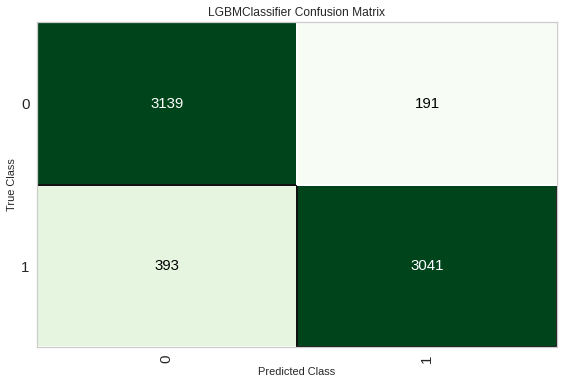

In [13]:
plot_model(model, plot='confusion_matrix')

In [17]:
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9134,0.9685,0.8861,0.9398,0.9122,0.8268,0.8282


In [18]:
final_model = finalize_model(tuned_model)

[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] bagging_fraction is 

In [24]:
pred = predict_model(final_model, test)

In [25]:
sub_pred = pred[['id', 'Label']]

In [31]:
names_columns = {
    'id': 'id', 
    'Label': 'predicted'
}
sub_pred = sub_pred.rename(columns=names_columns)

In [33]:
sub_pred.to_csv('submission/03.csv', index=False)